**Acerca del dataset**

Este conjunto de datos ayuda a estimar los niveles de obesidad en función de los hábitos alimentarios, los antecedentes familiares y la condición física. Incluye datos de personas de México, Perú y Colombia, que abarcan 16 características relacionadas con el estilo de vida y la salud con 2111 registros. Las etiquetas clasifican los niveles de obesidad, que van desde el bajo peso hasta diferentes tipos de obesidad.

La mayor parte de los datos se generaron mediante técnicas sintéticas, mientras que algunos se recogieron directamente de los usuarios a través de una plataforma web. Resulta útil para tareas de clasificación, regresión y agrupamiento.




**DICCIONARIO DE DATOS**

Sexo – Masculino o Femenino.

Edad – Edad de la persona en años.

Altura – Altura en metros.

Peso – Peso en kilogramos.

Historial_familiar_con_sobrepeso – Si la persona tiene antecedentes familiares de sobrepeso (sí/no).

FAVC – Si la persona consume frecuentemente alimentos altos en calorías (sí/no).

FCVC – Frecuencia de consumo de vegetales (escala de 1 a 3).

NCP – Número de comidas principales al día.

CAEC – Frecuencia de consumo de alimentos entre comidas (Nunca, A veces,
Frecuentemente, Siempre).

SMOKE – Si la persona fuma (sí/no).

CH2O – Ingesta diaria de agua (escala de 1 a 3).

SCC – Si la persona monitorea su ingesta calórica (sí/no).

FAF – Frecuencia de actividad física (escala de 0 a 3).

TUE – Tiempo de uso de tecnología (escala de 0 a 3).

CALC – Frecuencia de consumo de alcohol (Nunca, A veces, Frecuentemente, Siempre).

MTRANS – Modo de transporte principal (Automóvil, Bicicleta, Motocicleta, Transporte público, Caminar).

NObeyesdad – Nivel de obesidad (Peso insuficiente, Peso normal, Sobrepeso nivel I, Sobrepeso nivel II, Obesidad tipo I, Obesidad tipo II, Obesidad tipo III).

## CARGA DE DATOS

### Tarea:
cargar el archivo "ObesityDataSet_raw_and_data_sinthetic.csv"


Carga el conjunto de datos de un dataset de pandas y muestra las primeras 5 filas.



In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/a785496/An-lisis-de-Datos-1/refs/heads/main/data/ObesityDataSet_raw_and_data_sinthetic.csv')
display(df.head())
#número de filas y columnas
df.shape

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


(2111, 17)

Los datos cuentan con 2111 observasiones y 17 columnas

## Exploración de datos

### Subtask:
Explore the dataset to understand its structure, including data types, missing values, and summary statistics.


**Reasoning**:
I need to explore the dataset's structure, including data types, missing values, summary statistics, and distributions of key variables.



In [ ]:
# Revisar valores vacios.
print("\nMissing Values per Column:")
display(df.isnull().sum())



Missing Values per Column:


,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


Se puede observar que no existen valores vacios.

In [ ]:
# Generar estadisticas descriptivas.
print("\nDescriptive Statistics:")
display(df.describe())



Descriptive Statistics:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Se puede observar que las variables manejan diferentes valores de escalas, por lo que mas adelante se utilizara scaler para normalizar

In [ ]:
# Distribución de variable clave.
print("\nValue Counts for 'NObeyesdad':")
display(df['NObeyesdad'].value_counts())
print("\nValue Counts for 'Gender':")
display(df['Gender'].value_counts())



Value Counts for 'NObeyesdad':


,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272



Value Counts for 'Gender':


,count
Gender,
Male,1068
Female,1043


 Nos da una idea de cómo se distribuyen las personas en este conjunto de datos según su nivel de obesidad/peso y su género. La mayoría de las personas tienen problemas de peso (obesidad o sobrepeso), y hay una proporción similar de hombres y mujeres en el conjunto de datos.

In [ ]:
# Obtener un resumen conciso del dataframe.
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF              

Todas las columnas tienen 2111 entradas no nulas, lo que significa que no hay valores faltantes en este conjunto de datos.

Las columnas son de tipo object (texto o categóricas), int64 (enteros) o float64 (decimales).

In [ ]:
list(df.columns)

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FAVC',
 'FCVC',
 'NCP',
 'CAEC',
 'SMOKE',
 'CH2O',
 'SCC',
 'FAF',
 'TUE',
 'CALC',
 'MTRANS',
 'NObeyesdad']

Descripción de las columnas del archivo anterior siendo NObeyesdad nuestra variable objetivo.

## Data cleaning

### Subtask:
Clean the data by handling potential outliers and duplicates.


**Reasoning**:
Check for duplicates and handle outliers using visualization and winsorization.



Number of duplicates: 24
Duplicates removed.


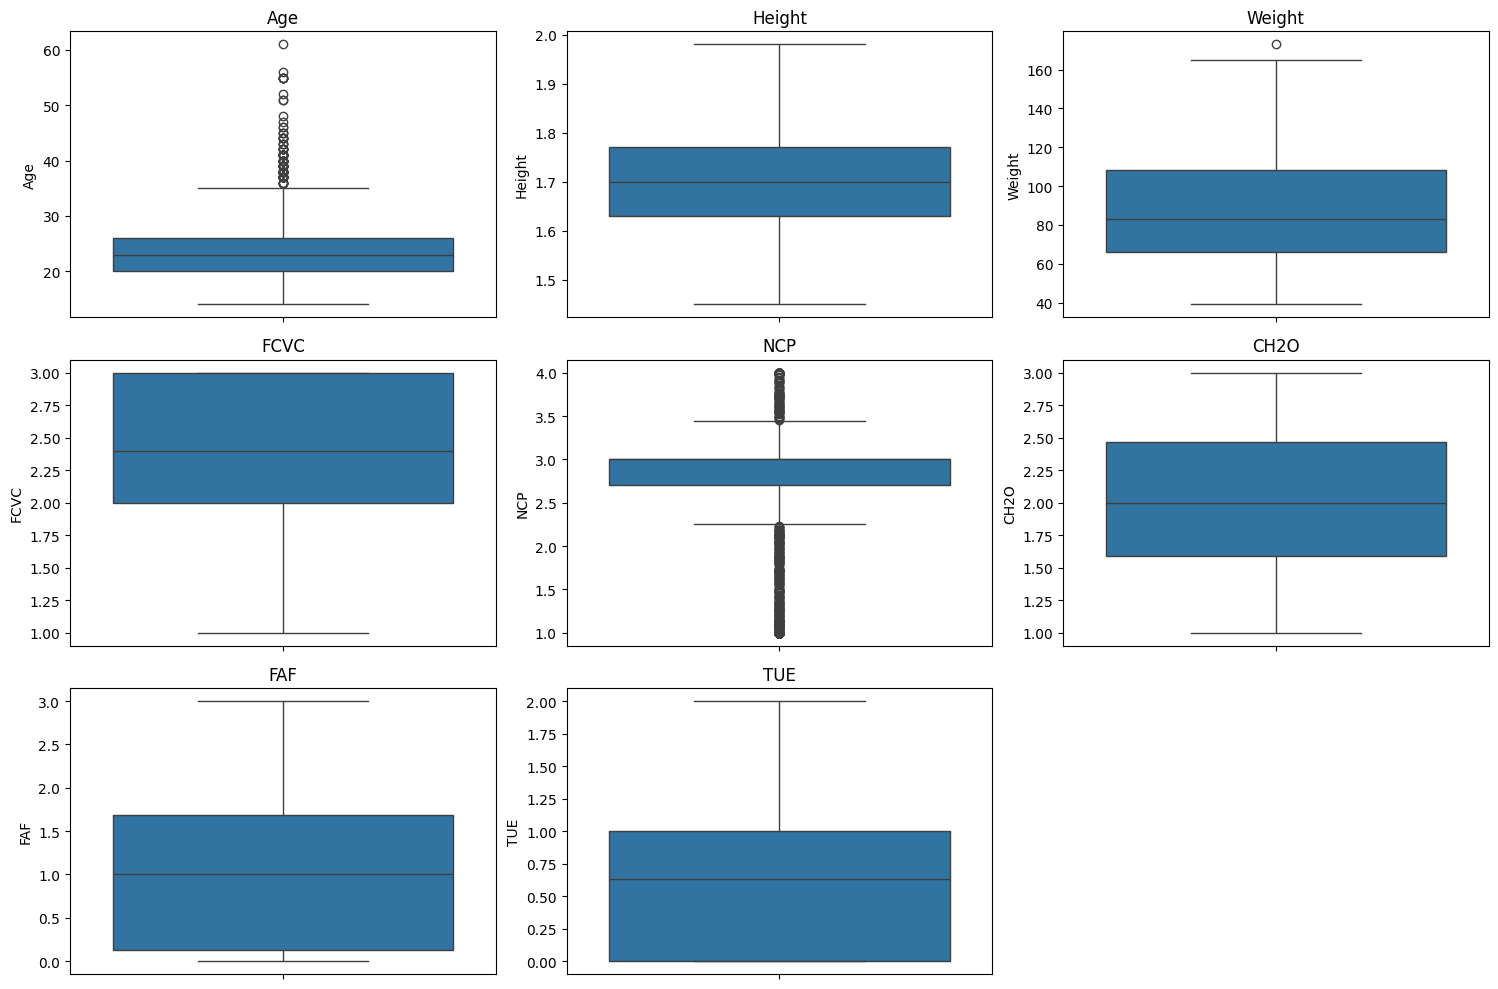

Dataframe shape after outlier handling: (2087, 17)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for duplicates
print(f"Number of duplicates: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")

# Handle outliers using box plots and winsorization
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

for col in numerical_features:
    upper_limit = df[col].quantile(0.99)
    lower_limit = df[col].quantile(0.01)
    df[col] = df[col].clip(lower_limit, upper_limit)

print(f"Dataframe shape after outlier handling: {df.shape}")

## Data wrangling

### Subtask:
Convert categorical features to numerical representations and engineer new features.


**Reasoning**:
Identify categorical columns, apply appropriate encoding (one-hot for nominal, label for ordinal, including the target variable), and engineer the BMI feature.



In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Exclude 'NObeyesdad' temporarily to handle it separately
if 'NObeyesdad' in categorical_cols:
    categorical_cols.remove('NObeyesdad')

# Apply one-hot encoding to nominal categorical features
nominal_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Label encode the target variable 'NObeyesdad'
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Create BMI feature
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

display(df.head())

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,BMI
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,False,...,False,False,False,False,True,False,False,True,False,24.386526
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,False,...,True,True,False,True,False,False,False,True,False,24.238227
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,True,...,False,False,True,False,False,False,False,True,False,23.765432
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,5,True,...,False,False,True,False,False,False,False,False,True,26.851852
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,6,True,...,False,False,False,True,False,False,False,True,False,28.342381


## Data analysis

### Subtask:
Perform descriptive statistics and analyze relationships between variables.


**Reasoning**:
Calculate descriptive statistics, analyze correlations, and visualize relationships between variables and the target variable.



,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.309085,1.702544,86.822728,2.421409,2.701203,2.004792,1.012827,0.663031,29.761460
std,6.138861,0.092659,26.046293,0.534807,0.764655,0.608281,0.853496,0.608152,7.994321
min,16.860000,1.500000,41.995800,1.000000,1.000000,1.000000,0.000000,0.000000,12.998298
25%,20.000000,1.630000,66.000000,2.000000,2.700000,1.590000,0.125000,0.000000,24.348590
50%,23.000000,1.700000,83.100000,2.400000,3.000000,2.000000,1.000000,0.631000,28.861592
75%,26.000000,1.770000,108.015000,3.000000,3.000000,2.465000,1.680000,1.000000,36.069759
max,44.000000,1.910000,150.399600,3.000000,4.000000,3.000000,3.000000,2.000000,50.252130


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,BMI,NObeyesdad
Age,1.000000,-0.033364,0.210367,0.015267,-0.061665,-0.046749,-0.154203,-0.305368,0.254696,0.238954
Height,-0.033364,1.000000,0.455937,-0.040693,0.228200,0.219572,0.295616,0.042399,0.122617,0.041352
Weight,0.210367,0.455937,1.000000,0.215434,0.091569,0.203885,-0.057193,-0.079629,0.934468,0.389372
FCVC,0.015267,-0.040693,0.215434,1.000000,0.034712,0.081268,0.021999,-0.104213,0.263780,0.025803
NCP,-0.061665,0.228200,0.091569,0.034712,1.000000,0.075176,0.127831,0.015775,0.027220,-0.088256
CH2O,-0.046749,0.219572,0.203885,0.081268,0.075176,1.000000,0.165254,0.020662,0.144384,0.092586
FAF,-0.154203,0.295616,-0.057193,0.021999,0.127831,0.165254,1.000000,0.058740,-0.184283,-0.135131
TUE,-0.305368,0.042399,-0.079629,-0.104213,0.015775,0.020662,0.058740,1.000000,-0.105229,-0.064874
BMI,0.254696,0.122617,0.934468,0.263780,0.027220,0.144384,-0.184283,-0.105229,1.000000,0.428587
NObeyesdad,0.238954,0.041352,0.389372,0.025803,-0.088256,0.092586,-0.135131,-0.064874,0.428587,1.000000


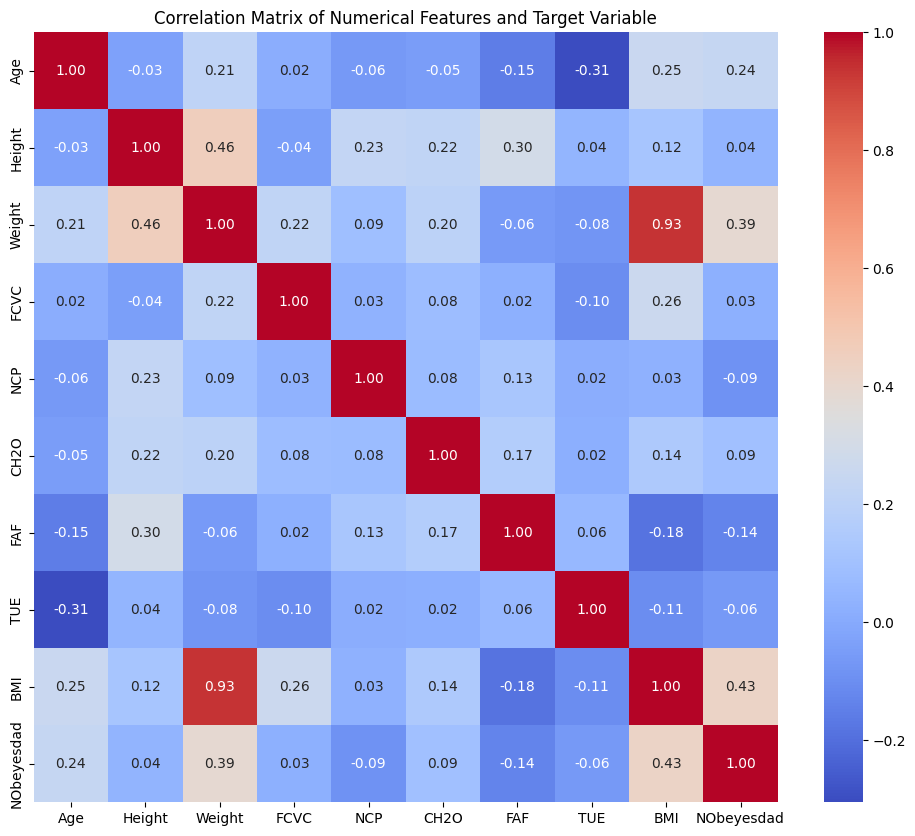

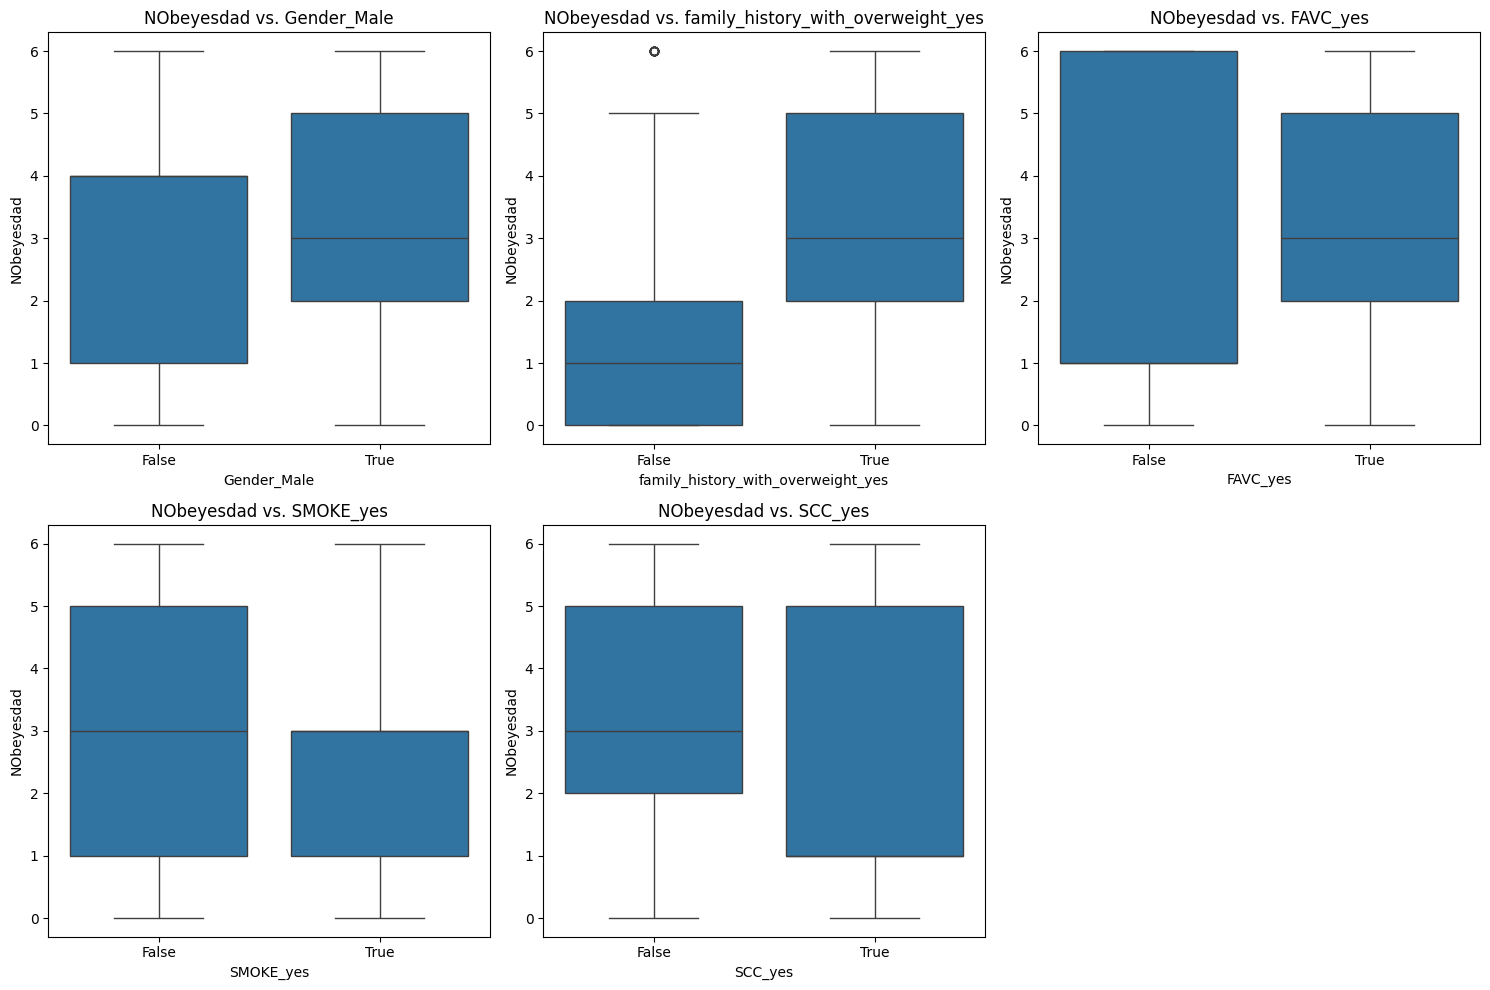

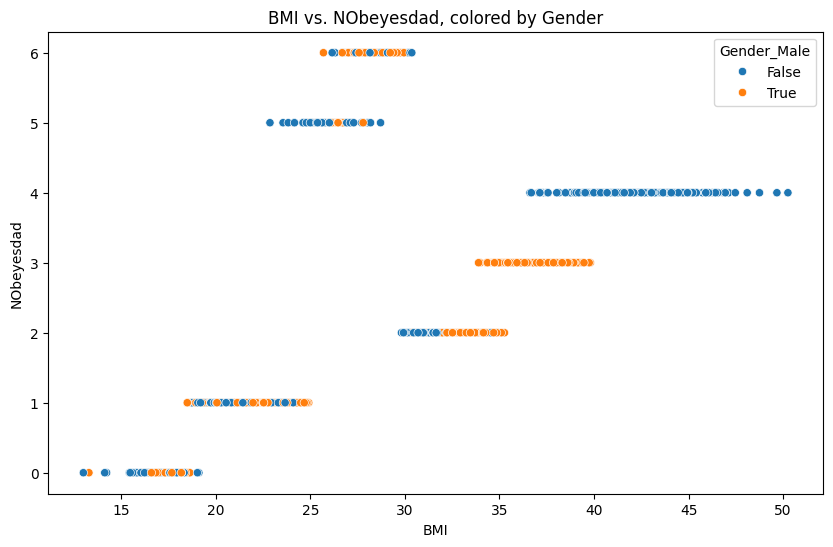

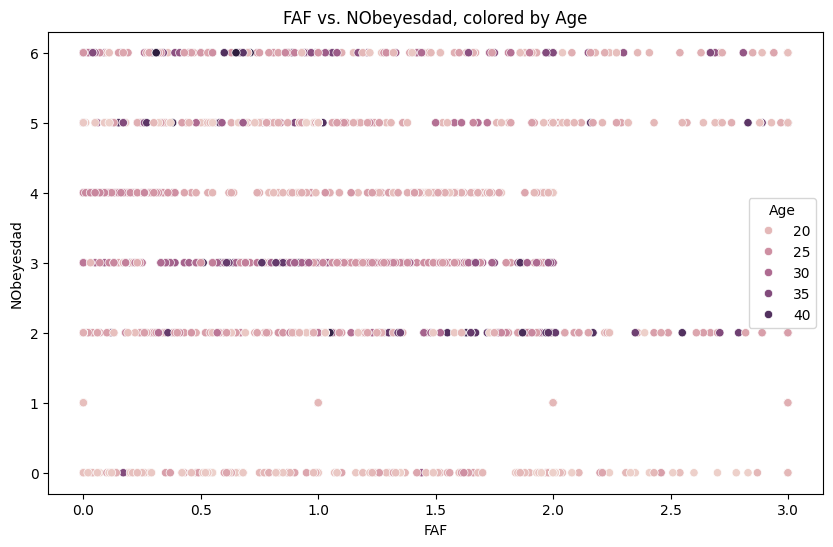

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics for numerical features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI']
display(df[numerical_features].describe())

# Correlation analysis
correlation_matrix = df[numerical_features + ['NObeyesdad']].corr()
display(correlation_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Target Variable')
plt.show()

# Analyze target variable distribution across demographic/lifestyle factors
categorical_features = ['Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes', 'SMOKE_yes', 'SCC_yes']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col], y=df['NObeyesdad'])
    plt.title(f'NObeyesdad vs. {col}')
plt.tight_layout()
plt.show()

# Investigate interactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='NObeyesdad', hue='Gender_Male', data=df)
plt.title('BMI vs. NObeyesdad, colored by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='FAF', y='NObeyesdad', hue='Age', data=df)
plt.title('FAF vs. NObeyesdad, colored by Age')
plt.show()

## Data visualization

### Subtask:
Create visualizations to represent key findings from the data analysis.


**Reasoning**:
Generate visualizations as instructed, including distribution plots, relationship plots, categorical variable impact visualizations, an enhanced correlation heatmap, and combined plots.



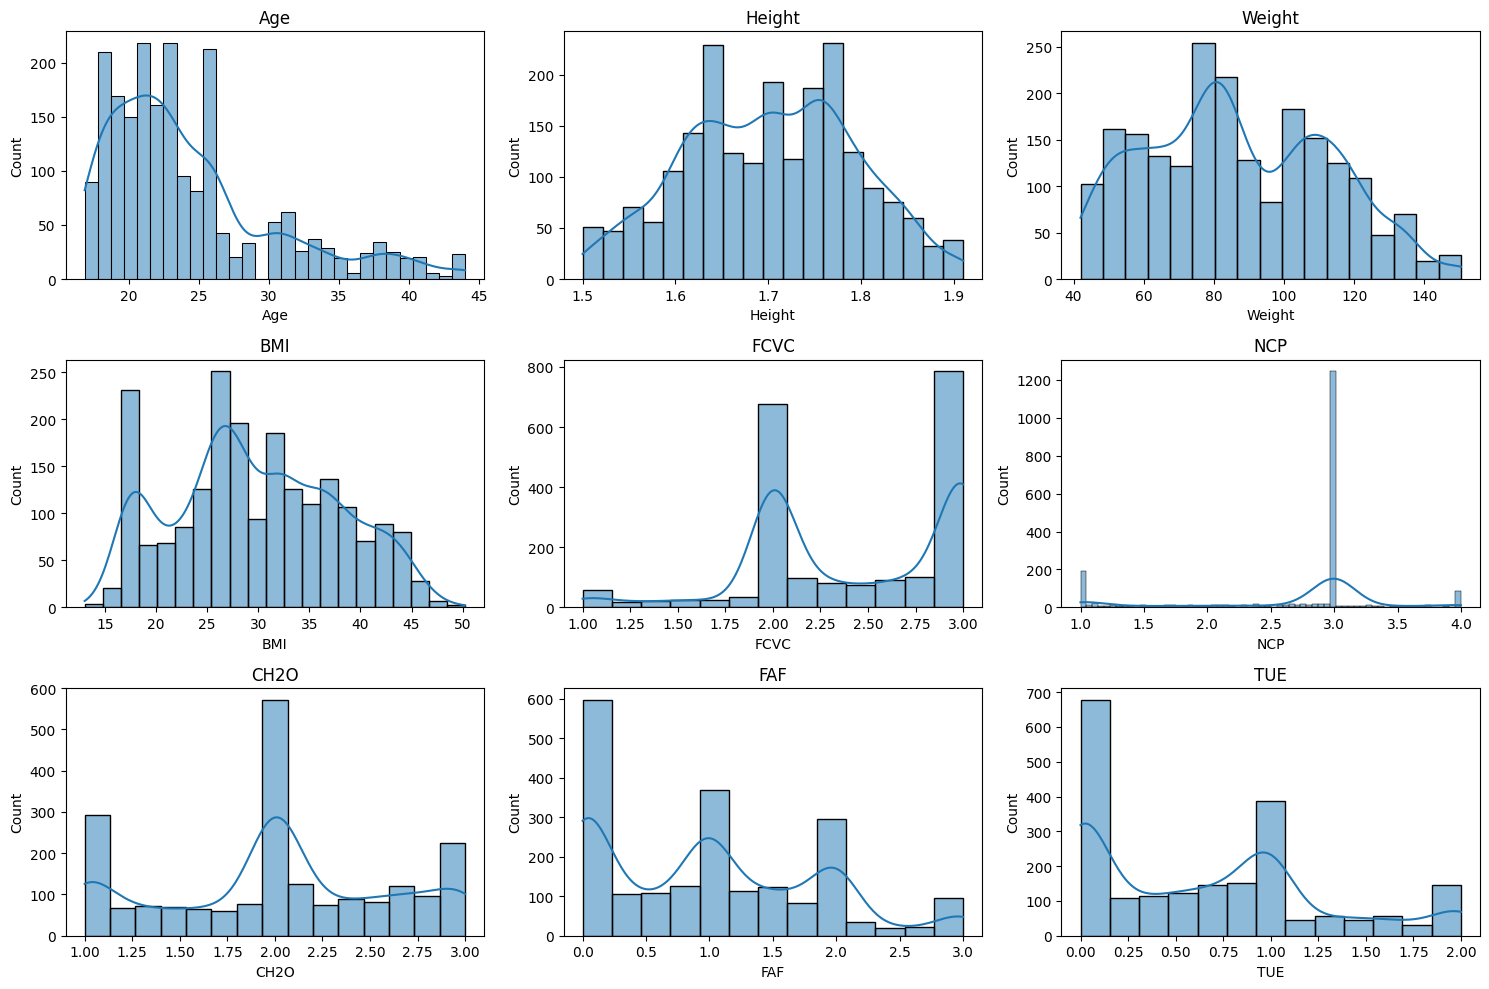

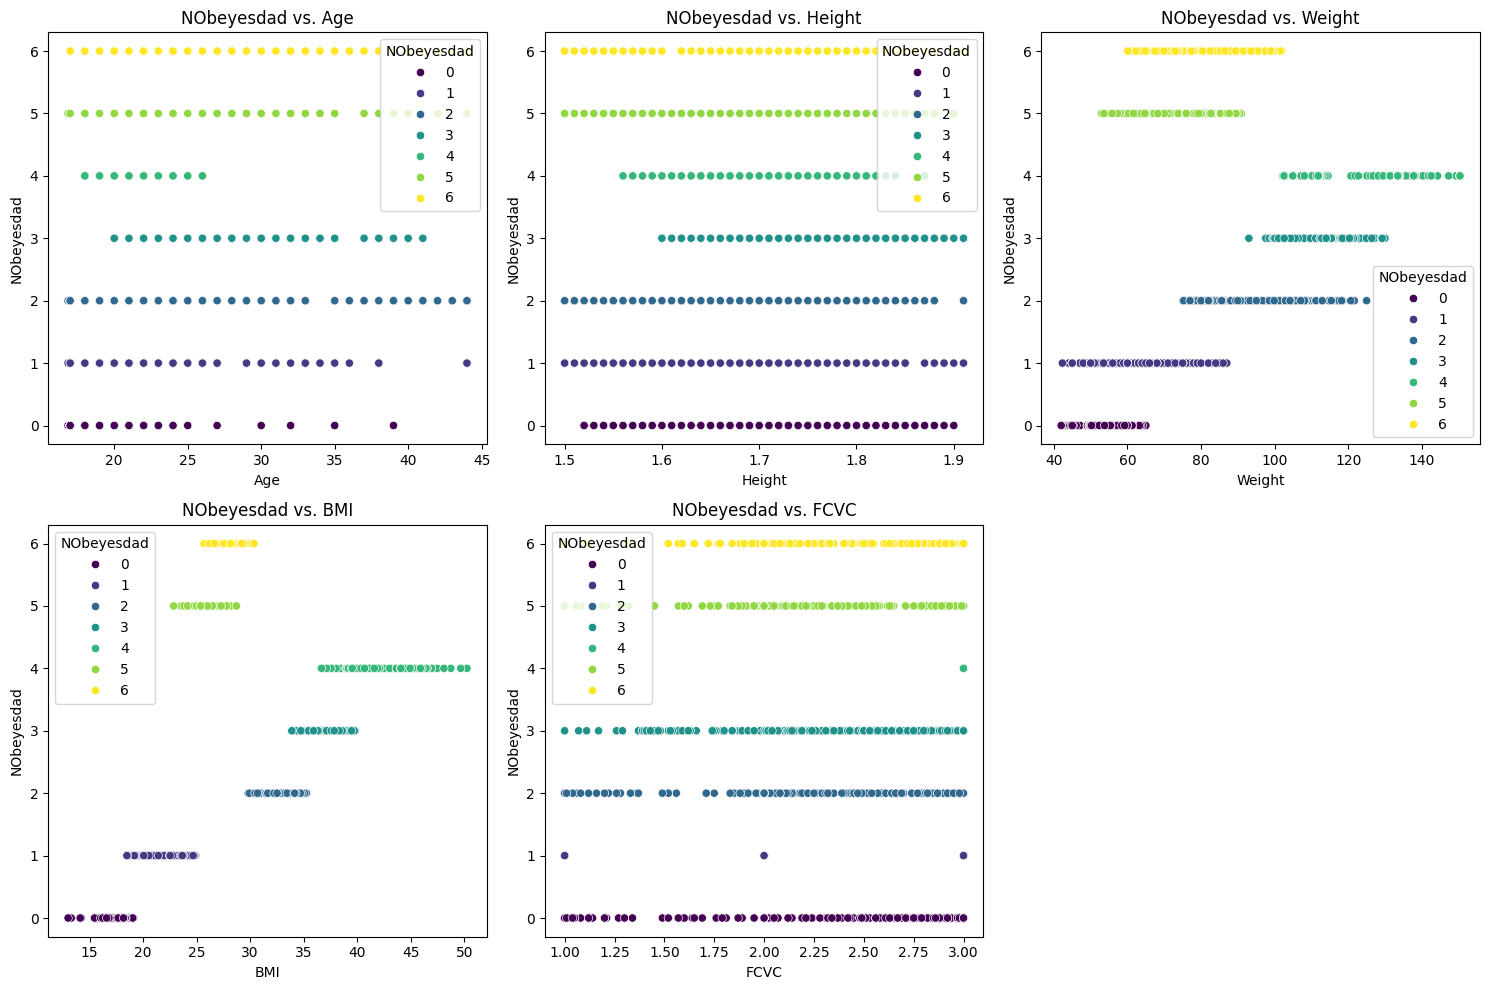

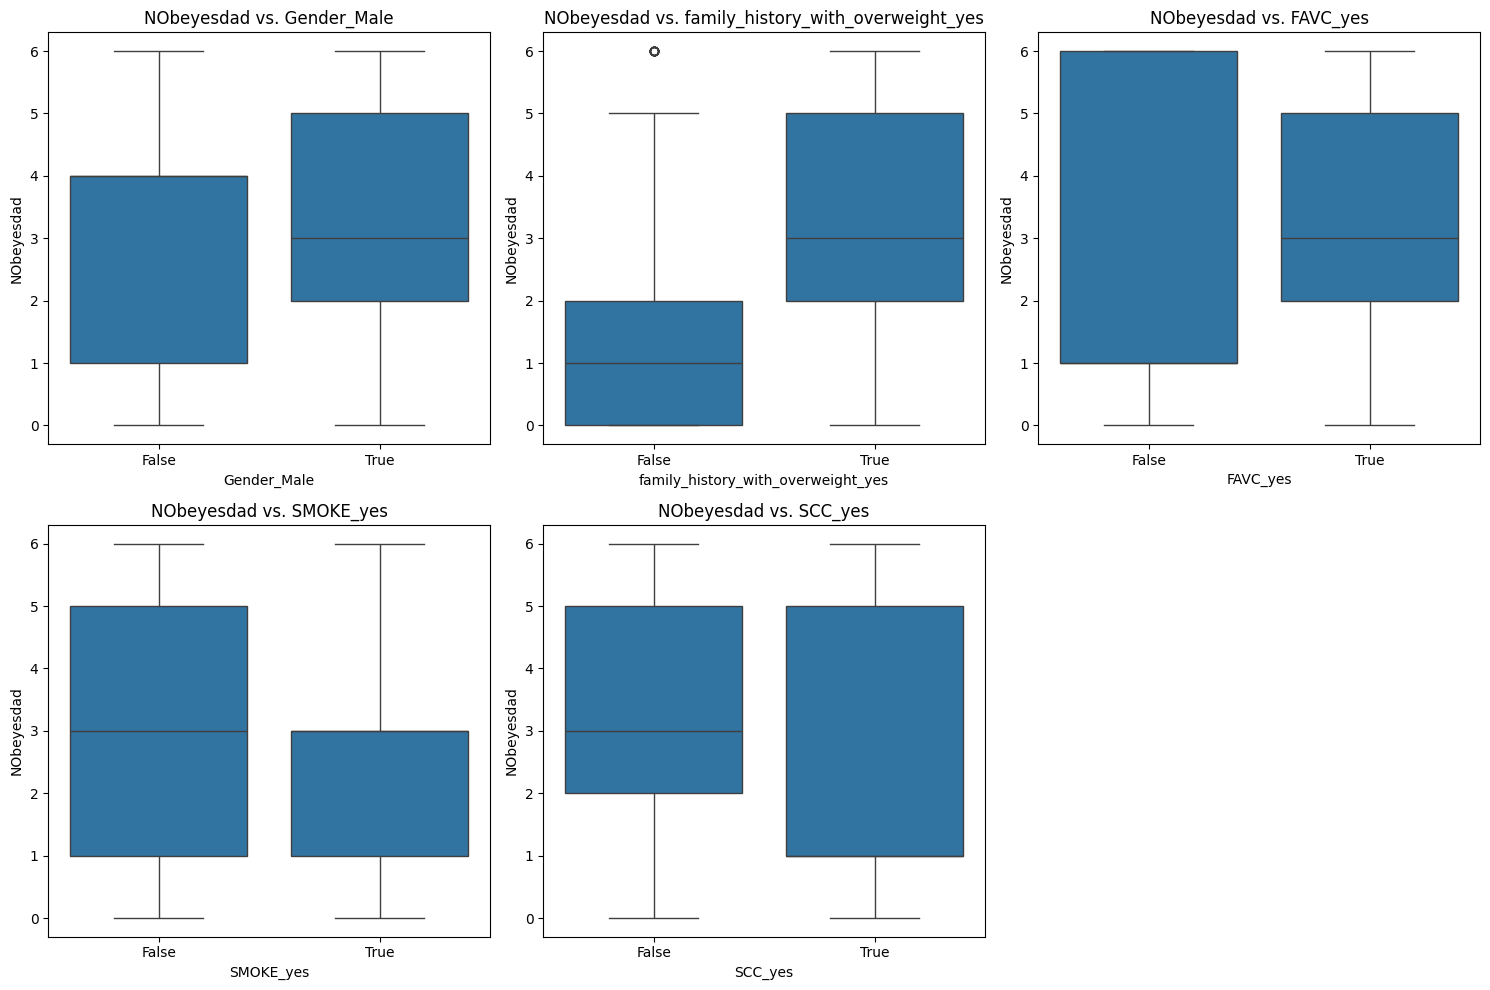

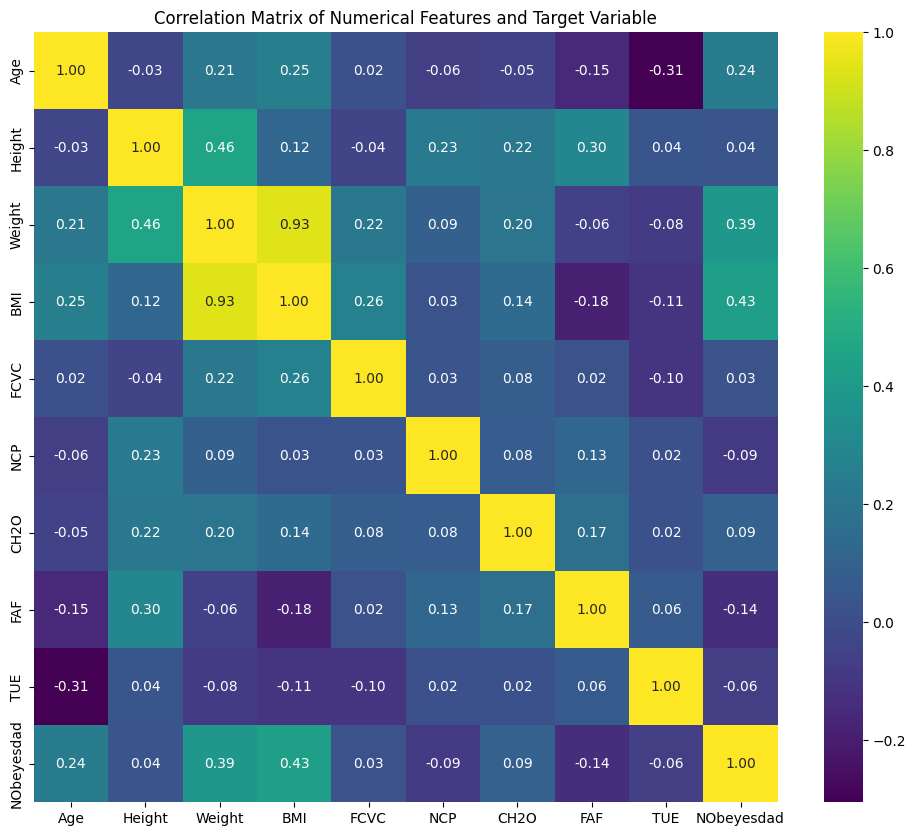

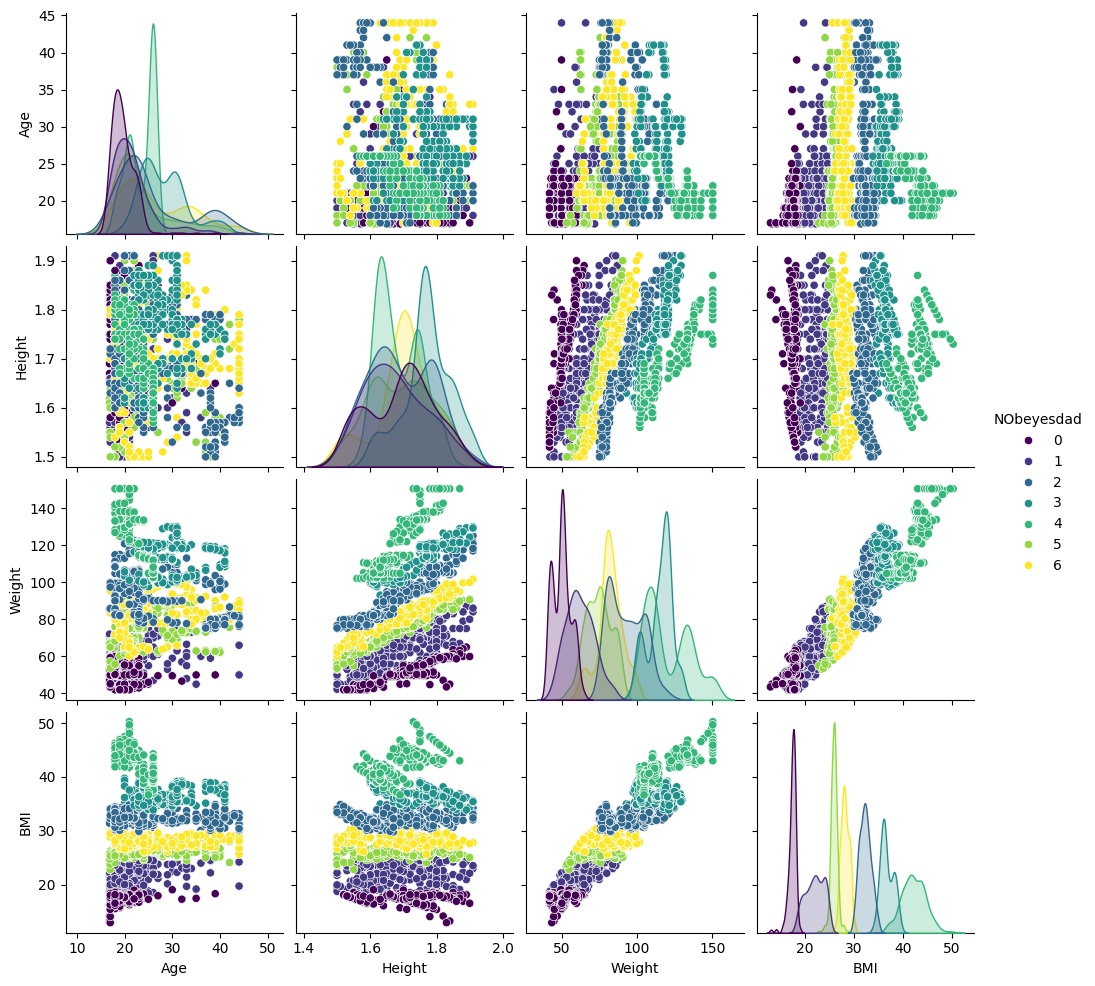

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Relationship Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'Height', 'Weight', 'BMI', 'FCVC']):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=col, y='NObeyesdad', hue='NObeyesdad', data=df, palette='viridis')
    plt.title(f'NObeyesdad vs. {col}')
plt.tight_layout()
plt.show()

# Categorical Variable Impact
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes', 'SMOKE_yes', 'SCC_yes']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=col, y='NObeyesdad', data=df)
    plt.title(f'NObeyesdad vs. {col}')
plt.tight_layout()
plt.show()


# Correlation Heatmap (Enhanced)
plt.figure(figsize=(12, 10))
correlation_matrix = df[['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Target Variable')
plt.show()


# Combined Plots (Scatter plot matrix)
sns.pairplot(df[['Age', 'Height', 'Weight', 'BMI', 'NObeyesdad']], hue='NObeyesdad', palette='viridis')
plt.show()

## Summary:

### 1. Q&A

No questions were posed in the provided data analysis task.


### 2. Data Analysis Key Findings

*   **Data Cleaning:** 24 duplicate rows were removed. Outliers in numerical features (Age, Height, Weight, etc.) were handled using winsorization (capping at the 1st and 99th percentiles).
*   **Feature Engineering:** A new feature, BMI, was created from Weight and Height. Categorical features were converted to numerical representations using one-hot encoding (for nominal features) and label encoding (for the target variable 'NObeyesdad').
*   **Correlation Analysis:**  A correlation matrix and heatmap were generated to visualize the relationships between numerical features and the target variable.  The code explicitly displays the correlation matrix allowing for identification of the strongest correlations.
*   **Target Variable Distribution:** Box plots revealed how the target variable ('NObeyesdad') varies across different demographic and lifestyle categories (Gender, family history of overweight, etc.).
*   **Variable Interactions:** Scatter plots showed relationships between BMI and 'NObeyesdad' stratified by gender and between 'FAF' and 'NObeyesdad' stratified by age.

### 3. Insights or Next Steps

*   Investigate the most influential features on obesity levels ('NObeyesdad') based on the correlation analysis and visualizations.  Features showing strong correlations or distinct patterns in the visualizations (e.g., BMI, FAF, family history) are prime candidates for further analysis.
*   Develop predictive models (e.g., regression, classification) to forecast obesity levels based on the identified key features.  The cleaned and preprocessed data is now ready for model training and evaluation.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X = df.drop('NObeyesdad', axis=1)  # Features
y = df['NObeyesdad']              # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% for training, 20% for testing

In [ ]:
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
logreg_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
logreg_predictions = logreg_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, logreg_predictions))

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))

print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Logistic Regression Accuracy: 0.8325358851674641
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91        59
           1       0.83      0.70      0.76        61
           2       0.89      0.81      0.85        70
           3       0.94      1.00      0.97        64
           4       0.97      1.00      0.98        60
           5       0.62      0.62      0.62        55
           6       0.61      0.78      0.68        49

    accuracy                           0.83       418
   macro avg       0.83      0.83      0.83       418
weighted avg       0.84      0.83      0.83       418

Decision Tree Accuracy: 0.9665071770334929
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        59
           1       0.95      0.95      0.95        61
           2       0.99      0.97      0.98        70
           3